<a href="https://colab.research.google.com/github/eliasingi12/DEEP_U-net_Project/blob/master/DEEP_u_net_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Upload
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [0]:
# https://github.com/eliasingi12/DEEP_U-net_Project/blob/master/DRIVE.tgz

In [0]:
# DRIVE dataset test path halló
!ls "/content/drive/My Drive/DRIVE/test"

1st_manual  2nd_manual	images	mask


In [0]:
# DRIVE dataset training path
!ls "/content/drive/My Drive/DRIVE/training"

1st_manual  images  mask


In [0]:
import os  # misc operating system specific operations, e.g., reading directries. 
import random

import cv2
import numpy as np

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

In [0]:
# Some parameters and paths to data
path_train = '/content/drive/My Drive/DRIVE/training'
path_test = '/content/drive/My Drive/DRIVE/test'

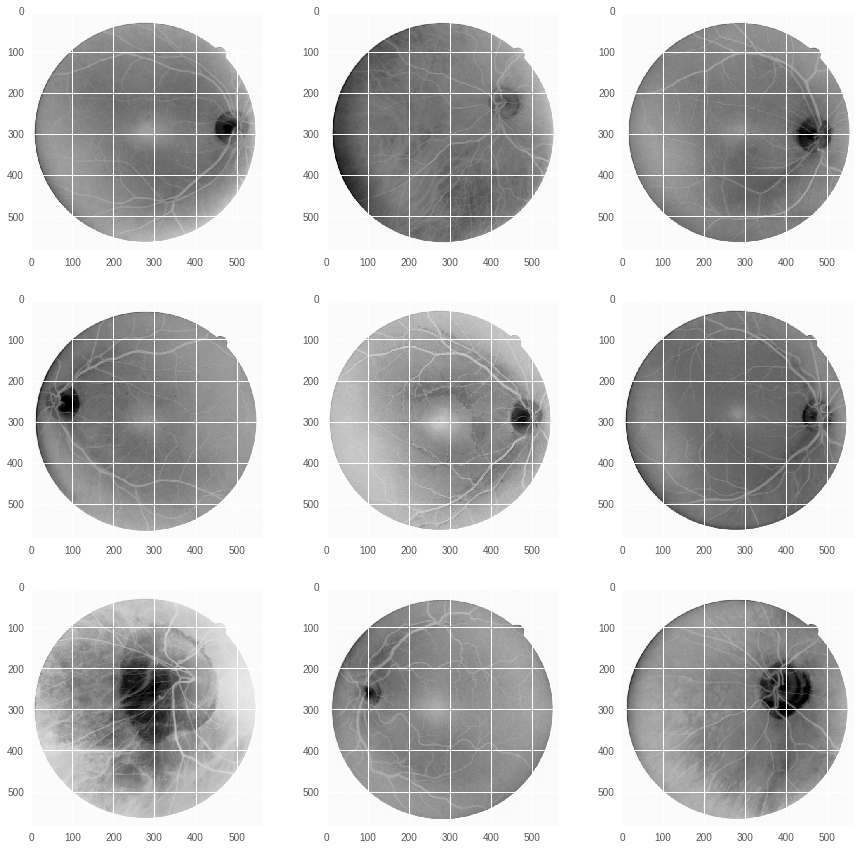

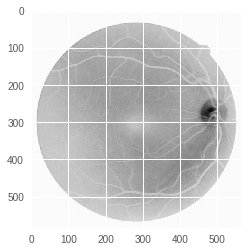

In [42]:
# Read in the file paths of the images to use for the training.
random_seed = 42
sz = 64
image_paths = list()
pre_dir = "/content/drive/My Drive/DRIVE/"

args = {}
args["training_imgs"] = pre_dir + "training/images/"
args["masked_imgs"] = pre_dir + "training/mask/"

for (dirpath, dirnames, filenames) in os.walk(args["training_imgs"]):
    for file in filenames:
        if '.tif' in file and not file.startswith('.'):
              image_paths.append(os.path.join(dirpath, file))
                
random.seed(random_seed)
random.shuffle(image_paths)


def show_images(imgs, grid_size=3):
  f, axarr = plt.subplots(grid_size,grid_size, figsize=(15, 15))
  for i in range(grid_size):
    for j in range(grid_size):
      axarr[i,j].imshow(imgs[i*grid_size+j])
  plt.show()
  

input_data   = []
input_labels = []
original_imgs = []
for image_path in image_paths:
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    original_imgs.append(image)
    input_data.append(image)
    label = image_path.split(os.path.sep)[-2]
    input_labels.append(label)
    
show_images(original_imgs)

img = cv2.imread('drive/My Drive/DRIVE/training/images/40_training.tif')
mask = cv2.imread('drive/My Drive/DRIVE/training/mask/40_training_mask.gif',0)
res = cv2.bitwise_and(img,img,mask = mask)
res = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)
plt.imshow(res)

#input_data = np.array(input_data, dtype="float") / 255.0
#input_labels = np.array(input_labels)
